In [1]:
import string 
import seaborn as sns
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
import warnings
warnings.filterwarnings("ignore")
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import pandas as pd
import io
from bnlp import BasicTokenizer
from bnlp.corpus import stopwords, punctuations, letters, digits
from bnlp.corpus.util import remove_stopwords


In [2]:
rstate = 30

In [3]:
df = pd.read_csv("vid.csv")
df.sample(frac=1)

,Serial,Youtube_ID,Speech,Label
67,68,https://www.youtube.com/watch?v=VlF9ZOxqNuc,একজন উদবেক নাগরিককে যদি সমুদ্র বিলাসে যেতে হয়...,0
11,12,https://www.youtube.com/watch?v=PosIiJ7-fiI,"Hello, সালাম ওয়ালেকুম. ওয়ালেকুম সালাম. Hi. ক...",1
40,41,https://www.youtube.com/watch?v=ziC1cHr85Oo,"হাত দিয়া নাড়ে চারে, থুতু দিয়া খাড়া করে, ফা...",1
146,147,https://www.youtube.com/watch?v=ymgB06E0gWE,বিস্তীর্ণ এলাকায় চলছে মহড়া শক্তির প্রমান দিত...,0
0,1,https://www.youtube.com/watch?v=_IzHIQvdohs,"এত রাত, BNP রা এখানে যে গালাগালি দেতাসে এক কিন...",1
...,...,...,...,...
201,202,https://www.youtube.com/watch?v=fox1i7UxpKI,তোর সঙ্গে আমার একটা কথা ছিল বল তুই কি আমার দুধ...,1
247,248,https://www.youtube.com/watch?v=vBljA1w2QDQ,নেতা মন্ত্রীদের ভবানীপুরে প্রচারে দেখা গিয়েছে...,0
137,138,https://www.youtube.com/watch?v=0XOR0DmH6-E,"লাগাবো. রিয়া, কালকে আমার মাথায় উঠে গেছিলো, ক...",1
71,72,https://www.youtube.com/watch?v=OADIXhy63Jo,সুপার ক্লাসিকোর শুরুটাও হলো শ্বাসরুদ্ধকর কোপা ...,0


In [4]:
df['Label'].value_counts()

0    150
1    150
Name: Label, dtype: int64

In [5]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [6]:
def remove_punctuation(txt):
    txt_nopunct = "".join([c for c in txt if c not in string.punctuation])
    return txt_nopunct

In [7]:
df['msg_clean'] = df['Speech'].apply(lambda x:remove_punctuation(x))
df.head()

,Serial,Youtube_ID,Speech,Label,msg_clean
0,1,https://www.youtube.com/watch?v=_IzHIQvdohs,"এত রাত, BNP রা এখানে যে গালাগালি দেতাসে এক কিন...",1,এত রাত BNP রা এখানে যে গালাগালি দেতাসে এক কিন্...
1,2,https://www.youtube.com/watch?v=2-ndr2h28jY,জীবনের যারা মুক্তি চাইতেছে আমি তারা বাইরে আসো ...,1,জীবনের যারা মুক্তি চাইতেছে আমি তারা বাইরে আসো ...
2,3,https://www.youtube.com/watch?v=88loU_FL5MM,আচ্ছা ও কি একদম পাগল হয়ে গেল নাকি? নির্লজ্জ ব...,1,আচ্ছা ও কি একদম পাগল হয়ে গেল নাকি নির্লজ্জ বে...
3,4,https://www.youtube.com/watch?v=bMYKQydmWCE,আমাকে পরিমরি খান তুই গণভবনে শেখ হাসিনার জামা ক...,1,আমাকে পরিমরি খান তুই গণভবনে শেখ হাসিনার জামা ক...
4,5,https://www.youtube.com/watch?v=E_EQzQf2TLY,"এ সেফাতুল্লার কারে শালা তুই বেয়াই বেয়াই কর, ...",1,এ সেফাতুল্লার কারে শালা তুই বেয়াই বেয়াই কর ত...


In [8]:

basic_tokenizer = BasicTokenizer()
df['tokenized'] = df['msg_clean'].apply(lambda x: basic_tokenizer.tokenize(x))

In [9]:

df.head()

,Serial,Youtube_ID,Speech,Label,msg_clean,tokenized
0,1,https://www.youtube.com/watch?v=_IzHIQvdohs,"এত রাত, BNP রা এখানে যে গালাগালি দেতাসে এক কিন...",1,এত রাত BNP রা এখানে যে গালাগালি দেতাসে এক কিন্...,"[এত, রাত, BNP, রা, এখানে, যে, গালাগালি, দেতাসে..."
1,2,https://www.youtube.com/watch?v=2-ndr2h28jY,জীবনের যারা মুক্তি চাইতেছে আমি তারা বাইরে আসো ...,1,জীবনের যারা মুক্তি চাইতেছে আমি তারা বাইরে আসো ...,"[জীবনের, যারা, মুক্তি, চাইতেছে, আমি, তারা, বাই..."
2,3,https://www.youtube.com/watch?v=88loU_FL5MM,আচ্ছা ও কি একদম পাগল হয়ে গেল নাকি? নির্লজ্জ ব...,1,আচ্ছা ও কি একদম পাগল হয়ে গেল নাকি নির্লজ্জ বে...,"[আচ্ছা, ও, কি, একদম, পাগল, হয়ে, গেল, নাকি, নি..."
3,4,https://www.youtube.com/watch?v=bMYKQydmWCE,আমাকে পরিমরি খান তুই গণভবনে শেখ হাসিনার জামা ক...,1,আমাকে পরিমরি খান তুই গণভবনে শেখ হাসিনার জামা ক...,"[আমাকে, পরিমরি, খান, তুই, গণভবনে, শেখ, হাসিনার..."
4,5,https://www.youtube.com/watch?v=E_EQzQf2TLY,"এ সেফাতুল্লার কারে শালা তুই বেয়াই বেয়াই কর, ...",1,এ সেফাতুল্লার কারে শালা তুই বেয়াই বেয়াই কর ত...,"[এ, সেফাতুল্লার, কারে, শালা, তুই, বেয়াই, বেয়..."


In [10]:


df['Removed Stopped word'] = df['msg_clean'].apply(lambda x: remove_stopwords(x,stopwords))
df.head()

,Serial,Youtube_ID,Speech,Label,msg_clean,tokenized,Removed Stopped word
0,1,https://www.youtube.com/watch?v=_IzHIQvdohs,"এত রাত, BNP রা এখানে যে গালাগালি দেতাসে এক কিন...",1,এত রাত BNP রা এখানে যে গালাগালি দেতাসে এক কিন্...,"[এত, রাত, BNP, রা, এখানে, যে, গালাগালি, দেতাসে...","[রাত, BNP, রা, গালাগালি, দেতাসে, এক, Facebook,..."
1,2,https://www.youtube.com/watch?v=2-ndr2h28jY,জীবনের যারা মুক্তি চাইতেছে আমি তারা বাইরে আসো ...,1,জীবনের যারা মুক্তি চাইতেছে আমি তারা বাইরে আসো ...,"[জীবনের, যারা, মুক্তি, চাইতেছে, আমি, তারা, বাই...","[জীবনের, মুক্তি, চাইতেছে, বাইরে, আসো, কথাবার্ত..."
2,3,https://www.youtube.com/watch?v=88loU_FL5MM,আচ্ছা ও কি একদম পাগল হয়ে গেল নাকি? নির্লজ্জ ব...,1,আচ্ছা ও কি একদম পাগল হয়ে গেল নাকি নির্লজ্জ বে...,"[আচ্ছা, ও, কি, একদম, পাগল, হয়ে, গেল, নাকি, নি...","[আচ্ছা, একদম, পাগল, নির্লজ্জ, বেহায়া, ছোটলোক,..."
3,4,https://www.youtube.com/watch?v=bMYKQydmWCE,আমাকে পরিমরি খান তুই গণভবনে শেখ হাসিনার জামা ক...,1,আমাকে পরিমরি খান তুই গণভবনে শেখ হাসিনার জামা ক...,"[আমাকে, পরিমরি, খান, তুই, গণভবনে, শেখ, হাসিনার...","[পরিমরি, খান, তুই, গণভবনে, শেখ, হাসিনার, জামা,..."
4,5,https://www.youtube.com/watch?v=E_EQzQf2TLY,"এ সেফাতুল্লার কারে শালা তুই বেয়াই বেয়াই কর, ...",1,এ সেফাতুল্লার কারে শালা তুই বেয়াই বেয়াই কর ত...,"[এ, সেফাতুল্লার, কারে, শালা, তুই, বেয়াই, বেয়...","[সেফাতুল্লার, কারে, শালা, তুই, বেয়াই, বেয়াই,..."


In [11]:
df['sentence']=df['Removed Stopped word'].apply(' '.join)

In [12]:
X=df['sentence']
y=df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rstate)

In [13]:
cv = CountVectorizer(stop_words = stopwords)
cv.fit(X)

# transform the training and testing data using count vectorizer object
X_train_count =  cv.transform(X_train)
X_test_count =  cv.transform(X_test)

tfidf_tr = TfidfTransformer()
X_train_count_tfidf = tfidf_tr.fit_transform(X_train_count)
X_test_count_tfidf = tfidf_tr.transform(X_test_count)

# ngram level tf-idf 
tv_ngram = TfidfVectorizer(ngram_range=(1,2))
tv_ngram.fit(X)
X_train_tfidf_ngram =  tv_ngram.transform(X_train)
X_test_tfidf_ngram =  tv_ngram.transform(X_test)

In [14]:
X_train_count.shape

(210, 2704)

In [15]:
X_test_count.shape

(90, 2704)

In [16]:
def classifierModel(classifier, Xtrain, Ytrain, Xtest,roc):
    classifier.fit(Xtrain, Ytrain)
    predictions = classifier.predict(Xtest)
    print(30*'=')
    print("Accuracy : ", accuracy_score(predictions, y_test))
    print(30*'=')
    if roc:
        probs = classifier.predict_proba(X_test_count_tfidf)
        preds = probs[:,1]
        fpr_svm, tpr_svm, threshold_svm = metrics.roc_curve(y_test, preds)
        roc_auc_svm = metrics.auc(fpr_svm, tpr_svm)

        import matplotlib.pyplot as plt
        plt.title(type(classifier).__name__)
        plt.plot(fpr_svm, tpr_svm, 'b', label = 'AUC = %0.2f' % roc_auc_svm)
        plt.legend(loc = 'lower right')
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()
    
    target_names = ['class 0', 'class 1']
    print(classification_report(y_test, predictions, target_names=target_names))

# Linear SVC


LinearSVM with Count Vectors: 
Accuracy :  0.9555555555555556


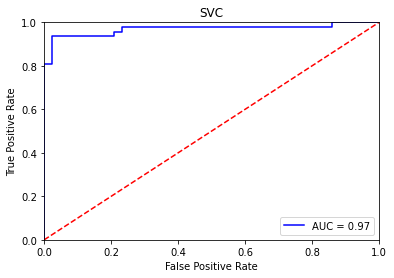

              precision    recall  f1-score   support

     class 0       0.93      0.98      0.95        43
     class 1       0.98      0.94      0.96        47

    accuracy                           0.96        90
   macro avg       0.96      0.96      0.96        90
weighted avg       0.96      0.96      0.96        90


LinearSVM with Count Vectors + TF-IDF: 
Accuracy :  0.9555555555555556


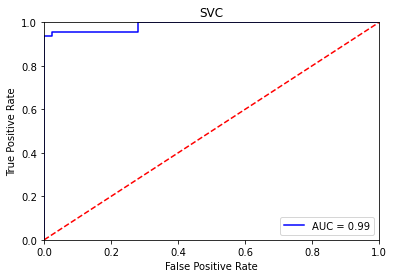

              precision    recall  f1-score   support

     class 0       0.93      0.98      0.95        43
     class 1       0.98      0.94      0.96        47

    accuracy                           0.96        90
   macro avg       0.96      0.96      0.96        90
weighted avg       0.96      0.96      0.96        90


LinearSVM with N-Gram Vectors: 
Accuracy :  0.9666666666666667
              precision    recall  f1-score   support

     class 0       0.93      1.00      0.97        43
     class 1       1.00      0.94      0.97        47

    accuracy                           0.97        90
   macro avg       0.97      0.97      0.97        90
weighted avg       0.97      0.97      0.97        90



In [17]:
print("\nLinearSVM with Count Vectors: ")
classifierModel(SVC(kernel='linear', probability=True), X_train_count, y_train, X_test_count,roc=True)

print("\nLinearSVM with Count Vectors + TF-IDF: ")
classifierModel(SVC(kernel='linear', probability=True), X_train_count_tfidf, y_train, X_test_count_tfidf,roc=True)

print("\nLinearSVM with N-Gram Vectors: ")
classifierModel(SVC(kernel='linear', probability=True), X_train_tfidf_ngram, y_train, X_test_tfidf_ngram,roc=False)



# Multinomial Naive Bayes


Naive Bayes with Count Vectors: 
Accuracy :  0.9666666666666667


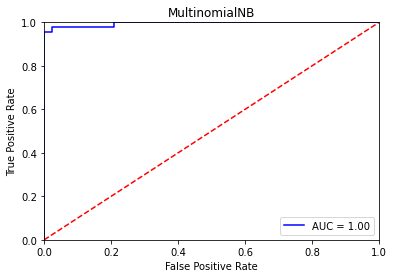

              precision    recall  f1-score   support

     class 0       0.93      1.00      0.97        43
     class 1       1.00      0.94      0.97        47

    accuracy                           0.97        90
   macro avg       0.97      0.97      0.97        90
weighted avg       0.97      0.97      0.97        90


Naive Bayes with Count Vectors + TF-IDF: 
Accuracy :  0.9555555555555556


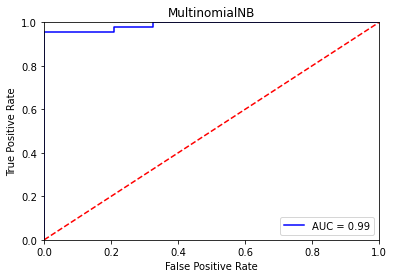

              precision    recall  f1-score   support

     class 0       0.91      1.00      0.96        43
     class 1       1.00      0.91      0.96        47

    accuracy                           0.96        90
   macro avg       0.96      0.96      0.96        90
weighted avg       0.96      0.96      0.96        90


Naive Bayes with N-Gram Vectors: 
Accuracy :  0.9222222222222223
              precision    recall  f1-score   support

     class 0       0.86      1.00      0.92        43
     class 1       1.00      0.85      0.92        47

    accuracy                           0.92        90
   macro avg       0.93      0.93      0.92        90
weighted avg       0.93      0.92      0.92        90



In [18]:
print("\nNaive Bayes with Count Vectors: ")
classifierModel(MultinomialNB(), X_train_count, y_train, X_test_count,roc=True)

print("\nNaive Bayes with Count Vectors + TF-IDF: ")
classifierModel(MultinomialNB(), X_train_count_tfidf, y_train, X_test_count_tfidf,roc=True)

print("\nNaive Bayes with N-Gram Vectors: ")
classifierModel(MultinomialNB(), X_train_tfidf_ngram, y_train, X_test_tfidf_ngram,roc=False)

# Random Forrest


Random Forrest Classifier with Count Vectors: 
Accuracy :  0.9444444444444444


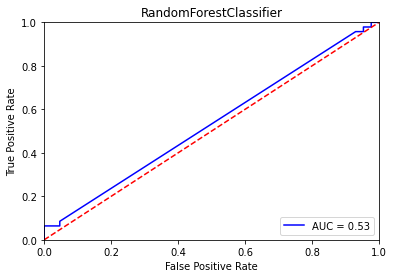

              precision    recall  f1-score   support

     class 0       0.90      1.00      0.95        43
     class 1       1.00      0.89      0.94        47

    accuracy                           0.94        90
   macro avg       0.95      0.95      0.94        90
weighted avg       0.95      0.94      0.94        90


Random Forrest Classifier with Count Vectors + TF-IDF: 
Accuracy :  0.9666666666666667


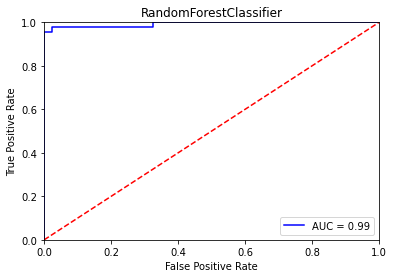

              precision    recall  f1-score   support

     class 0       0.93      1.00      0.97        43
     class 1       1.00      0.94      0.97        47

    accuracy                           0.97        90
   macro avg       0.97      0.97      0.97        90
weighted avg       0.97      0.97      0.97        90


Random Forrest Classifier with N-Gram Vectors: 
Accuracy :  0.9777777777777777
              precision    recall  f1-score   support

     class 0       0.98      0.98      0.98        43
     class 1       0.98      0.98      0.98        47

    accuracy                           0.98        90
   macro avg       0.98      0.98      0.98        90
weighted avg       0.98      0.98      0.98        90



In [19]:
print("\nRandom Forrest Classifier with Count Vectors: ")
classifierModel(RandomForestClassifier(random_state=rstate,n_estimators=1024), X_train_count, y_train, X_test_count,roc=True)

print("\nRandom Forrest Classifier with Count Vectors + TF-IDF: ")
classifierModel(RandomForestClassifier(random_state=rstate,n_estimators=1024), X_train_count_tfidf, y_train, X_test_count_tfidf,roc=True)

print("\nRandom Forrest Classifier with N-Gram Vectors: ")
classifierModel(RandomForestClassifier(random_state=rstate,n_estimators=1024), X_train_tfidf_ngram, y_train, X_test_tfidf_ngram,roc=False)

# Logistic Regression


Logistic Regression with Count Vectors: 
Accuracy :  0.9777777777777777


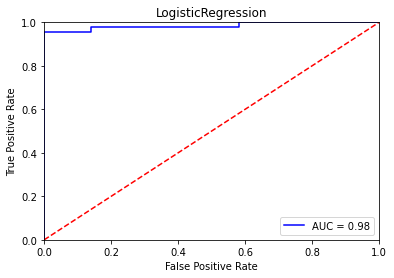

              precision    recall  f1-score   support

     class 0       0.96      1.00      0.98        43
     class 1       1.00      0.96      0.98        47

    accuracy                           0.98        90
   macro avg       0.98      0.98      0.98        90
weighted avg       0.98      0.98      0.98        90


Logistic Regression with Count Vectors + TF-IDF: 
Accuracy :  0.9777777777777777


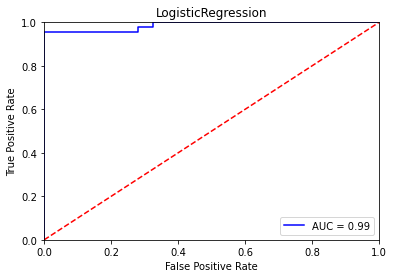

              precision    recall  f1-score   support

     class 0       0.96      1.00      0.98        43
     class 1       1.00      0.96      0.98        47

    accuracy                           0.98        90
   macro avg       0.98      0.98      0.98        90
weighted avg       0.98      0.98      0.98        90


Logistic Regression with N-Gram Vectors: 
Accuracy :  0.9444444444444444
              precision    recall  f1-score   support

     class 0       0.90      1.00      0.95        43
     class 1       1.00      0.89      0.94        47

    accuracy                           0.94        90
   macro avg       0.95      0.95      0.94        90
weighted avg       0.95      0.94      0.94        90



In [20]:

print("\nLogistic Regression with Count Vectors: ")
classifierModel(LogisticRegression(), X_train_count, y_train, X_test_count,roc=True)

print("\nLogistic Regression with Count Vectors + TF-IDF: ")
classifierModel(LogisticRegression(), X_train_count_tfidf, y_train, X_test_count_tfidf,roc=True)

print("\nLogistic Regression with N-Gram Vectors: ")
classifierModel(LogisticRegression(), X_train_tfidf_ngram, y_train, X_test_tfidf_ngram,roc=False)
